**1.DATA
COLLECTION:**

**TASK 1.1: IMPORT DATASETS RELATED TO VEHICLE REGISTRATIONS, ENERGY GENERATION, AND STATE CODES.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sc = '/content/drive/MyDrive/Colab Notebooks/Copy of state_codes.xlsx'
state_code=pd.read_excel(sc)
r = '/content/drive/MyDrive/Colab Notebooks/Copy of States_Electric_Vehicle_Registrations_2018.xlsx'
registration_EV =pd.read_excel(r)
e='/content/drive/MyDrive/Colab Notebooks/Copy of States_Annual_Energy_Generation_Sources_1990_2019.xlsx'
energy_generation =pd.read_excel(e)
re = '/content/drive/MyDrive/Colab Notebooks/Copy of States_All_Vehicle_Registrations_2018.xlsx'
all_vehicle_registration =pd.read_excel(re)

**TASK 1.2: CLEAN AND PREPROCESS DATA TO ENSURE CONSISTENCY AND ACCURACY FOR ANALYSIS**

In [4]:
state_code

,state_code,state_name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AZ,Arizona
4,CA,California
5,CO,Colorado
6,CT,Connecticut
7,DC,District of Columbia
8,DE,Delaware
9,FL,Florida


In [5]:
registration_EV

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Electric Vehicle Registrations by State,NaN,NaN,NaN
1,NaN,State,Registration Count,NaN,NaN
2,NaN,Alabama,1450,NaN,NaN
3,NaN,Alaska,530,NaN,NaN
4,NaN,Arizona,15000,NaN,NaN
5,NaN,Arkansas,520,NaN,NaN
6,NaN,California,256800,NaN,NaN
7,NaN,Colorado,11700,NaN,NaN
8,NaN,Connecticut,4450,NaN,NaN
9,NaN,Delaware,720,NaN,NaN


In [6]:
registration_EV.drop(["Unnamed: 0","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [7]:
registration_EV.drop([0,1,53],axis=0,inplace=True)

In [8]:
registration_EV.rename(columns={'Unnamed: 1':'State','Unnamed: 2':'Registration Count'},inplace=True)

In [9]:
registration_EV.sort_values(by='Registration Count').reset_index().drop('index',axis=1)

,State,Registration Count
0,Wyoming,170
1,North Dakota,170
2,West Virginia,230
3,South Dakota,260
4,Mississippi,390
5,Montana,500
6,Arkansas,520
7,Alaska,530
8,Rhode Island,600
9,Delaware,720


In [10]:
energy_generation

,State Historical Tables for 2019\nReleased: September 2020\nRevised: February 2021\nNext Update: November 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),isodd,isna,istext,isblank,COUNT,sum
1,1990,AK,Total Electric Power Industry,Total,5599506,False,False,True,False,15,16018406
2,1990,AK,Total Electric Power Industry,Coal,510573,True,False,True,False,1,510573
3,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521,True,False,True,False,7,27720700
4,1990,AK,Total Electric Power Industry,Natural Gas,3466261,True,False,True,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
53752,2019,WY,"Electric Generators, Electric Utilities",Coal,34313690,False,False,True,False,NaN,NaN
53753,2019,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,984521,True,False,True,False,NaN,NaN
53754,2019,WY,"Electric Generators, Electric Utilities",Natural Gas,411640,False,False,True,False,NaN,NaN
53755,2019,WY,"Electric Generators, Electric Utilities",Petroleum,43547,True,False,True,False,NaN,NaN


In [11]:
energy_generation.rename(columns={'State Historical Tables for 2019\nReleased: September 2020\nRevised: February 2021\nNext Update: November 2021':'YEAR','Unnamed: 1':'STATE','Unnamed: 2':'TYPE OF PRODUCER','Unnamed: 3':'ENERGY SOURCE','Unnamed: 4':'Generation(MWh)'},inplace=True)

In [12]:
energy_generation.drop(0,inplace=True)

In [13]:
energy_generation.drop(columns=['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)

In [14]:
all_vehicle_registration.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'],axis=1,inplace=True)

In [15]:
all_vehicle_registration.drop([0,1,2,3,4,5,6,7,8,9,10,63],inplace=True,)

In [16]:
all_vehicle_registration.rename(columns={'Unnamed: 1':'private_commercial_cars','Unnamed: 2':'publicly_owned_car','Unnamed: 3':'Total'},inplace=True)

In [17]:
all_vehicle_registration.reset_index().drop('index',axis=1)

,,private_commercial_cars,publicly_owned_car,Total
0,Alabama,2116626,44586,2161212
1,Alaska,179131,4139,183270
2,Arizona,2372443,19329,2391772
3,Arkansas,908561,12600,921161
4,California,14820833,244994,15065827
5,Colorado,1782358,15819,1798177
6,Connecticut,1305544,1165,1306709
7,Delaware,431850,1513,433363
8,Dist. of Col.,188768,20955,209723
9,Florida,7851192,114899,7966091


**2.DATA
EXPLORATION:**

**TASK 2.1: PERFORM EXPLORATORY DATA ANALYSIS
(EDA) TO UNDERSTAND THE DISTRIBUTION AND
CHARACTERISTICS OF THE DATA.**

In [18]:
energy_generation.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,Generation(MWh)
1,1990,AK,Total Electric Power Industry,Total,5599506
2,1990,AK,Total Electric Power Industry,Coal,510573
3,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
4,1990,AK,Total Electric Power Industry,Natural Gas,3466261
5,1990,AK,Total Electric Power Industry,Petroleum,497116


In [19]:
energy_generation.shape

(53756, 5)

In [20]:
energy_generation.duplicated().sum()

np.int64(0)

In [21]:
energy_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53756 entries, 1 to 53756
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              53756 non-null  object
 1   STATE             53756 non-null  object
 2   TYPE OF PRODUCER  53756 non-null  object
 3   ENERGY SOURCE     53756 non-null  object
 4   Generation(MWh)   53756 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [22]:
energy_generation['GENERATION (GWh)'] = energy_generation['Generation(MWh)'] / 1000


In [23]:
energy_generation['Generation(MWh)']= energy_generation['Generation(MWh)'].astype('int')
energy_generation['GENERATION (GWh)']= energy_generation['GENERATION (GWh)'].astype('int')

In [24]:
energy_generation.describe()

,Generation(MWh),GENERATION (GWh)
count,5.375600e+04,5.375600e+04
mean,1.693131e+07,1.693085e+04
std,1.309890e+08,1.309890e+05
min,-8.823445e+06,-8.823000e+03
25%,2.684825e+04,2.600000e+01
50%,3.279665e+05,3.270000e+02
75%,3.405300e+06,3.405000e+03
max,4.178277e+09,4.178277e+06


In [25]:
energy_generation.isnull().sum()

,0
YEAR,0
STATE,0
TYPE OF PRODUCER,0
ENERGY SOURCE,0
Generation(MWh),0
GENERATION (GWh),0


**TASK 2.2: VISUALIZE DATA USING MATPLOTLIB AND
SEABORN TO IDENTIFY TRENDS AND PATTERNS.**

In [26]:
registred_EV= registration_EV.sort_values(by='Registration Count',ascending=False)

/tmp/ipython-input-3347347911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=registred_EV.head(10), x='Registration Count', y='State',palette=green_colors,orient='h')


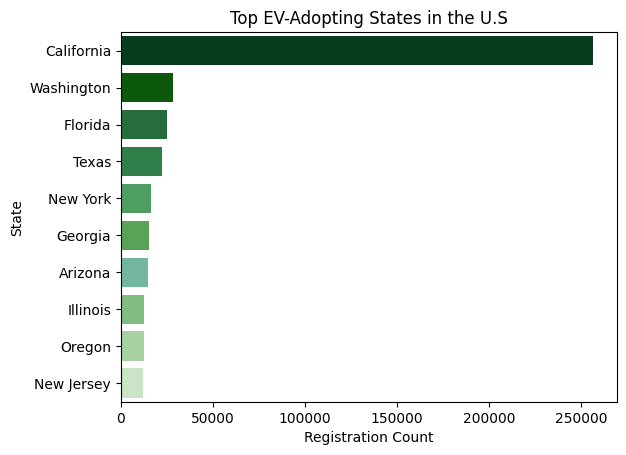

In [27]:
green_colors = ['#00441b','#006400','#1b7837','#238b45','#41ab5d','#4daf4a','#66c2a4','#78c679','#a1d99b','#c7e9c0' ]
sns.barplot(data=registred_EV.head(10), x='Registration Count', y='State',palette=green_colors,orient='h')
plt.title('Top EV-Adopting States in the U.S')
plt.show()


In [28]:
Energy_Source = energy_generation[energy_generation['ENERGY SOURCE'] !='Total']

In [29]:
Producer_count= Energy_Source.groupby("TYPE OF PRODUCER")['GENERATION (GWh)'].sum().reset_index()

In [30]:
Producer_count=Producer_count.sort_values(by='GENERATION (GWh)',ascending=True)


/tmp/ipython-input-3866813066.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Producer_count.tail(), x='GENERATION (GWh)', y='TYPE OF PRODUCER',orient='h',palette='Greens')


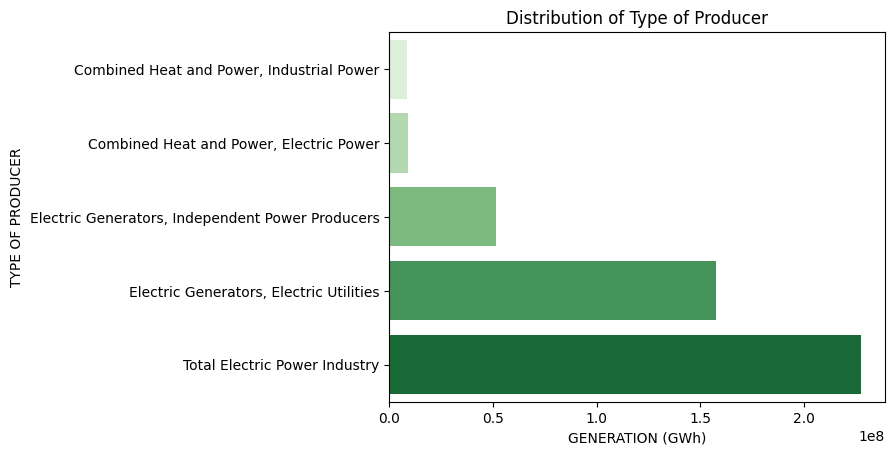

In [31]:
sns.barplot(data=Producer_count.tail(), x='GENERATION (GWh)', y='TYPE OF PRODUCER',orient='h',palette='Greens')
plt.title('Distribution of Type of Producer')
plt.show()


In [32]:
Energy_Source_Generation= Energy_Source.groupby("ENERGY SOURCE")['GENERATION (GWh)'].sum().sort_values(ascending=False).reset_index()

In [33]:
Energy_Source_Generation

,ENERGY SOURCE,GENERATION (GWh)
0,Coal,203906179
1,Natural Gas,98647368
2,Nuclear,89000627
3,Hydroelectric Conventional,33800514
4,Wind,8935421
5,Petroleum,8933581
6,Wood and Wood Derived Fuels,4547855
7,Other Biomass,2261066
8,Geothermal,1816026
9,Other Gases,1532299


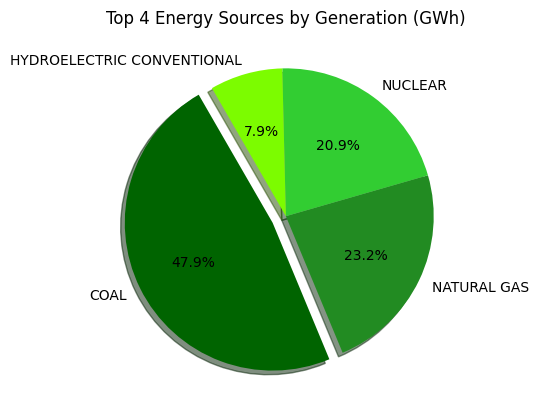

In [34]:
labels=(['COAL','NATURAL GAS','NUCLEAR','HYDROELECTRIC CONVENTIONAL'])
myexplode=([0.1,0,0,0])
green_colors = ['#006400', '#228B22', '#32CD32', '#7CFC00']
plt.pie(Energy_Source_Generation['GENERATION (GWh)'].head(4),colors=green_colors,labels=labels,explode=myexplode,shadow=True,
        startangle=120,autopct='%1.1f%%')
plt.title("Top 4 Energy Sources by Generation (GWh)")
plt.show()

**3.CORRELATION ANALYSIS**

**TASK 3.1: ANALYZE THE CORRELATION BETWEEN
ELECTRIC VEHICLE REGISTRATIONS AND DIFFERENT
SOURCES OF ENERGY PRODUCTION.**

In [35]:
Yearly_Production=Energy_Source[Energy_Source['YEAR']==  2018]

In [36]:
energy_production = Yearly_Production.groupby(['STATE','ENERGY SOURCE'])['Generation(MWh)'].sum().reset_index()

In [37]:
energy_production=energy_production.pivot_table(index='STATE',columns='ENERGY SOURCE',values='Generation(MWh)')

In [38]:
energy_production

ENERGY SOURCE,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels
STATE,,,,,,,,,,,,,
AK,1.257128e+06,NaN,3328450.0,5.895805e+06,NaN,-6200.0,90948.0,NaN,1618557.0,NaN,NaN,310030.0,0.0
AL,6.355504e+07,NaN,22286278.0,1.176008e+08,7.892565e+07,-98.0,75344.0,9608.0,131407.0,NaN,714504.0,NaN,6817414.0
AR,5.999220e+07,NaN,6017550.0,4.124741e+07,2.544164e+07,10174.0,149900.0,NaN,71034.0,80490.0,406826.0,NaN,2581480.0
AZ,6.148925e+07,NaN,13964484.0,7.433615e+07,6.219452e+07,-5072.0,74750.0,NaN,99892.0,-9052.0,10280753.0,1060380.0,364240.0
CA,5.626560e+05,23353682.0,52661333.0,1.796094e+08,3.642704e+07,1657536.0,5647697.0,2907920.0,137756.0,-297148.0,53970354.0,28047902.0,6245143.0
CO,5.276412e+07,NaN,3650770.0,3.279688e+07,NaN,118584.0,151576.0,NaN,23764.0,-525476.0,2124760.0,19490300.0,177278.0
CT,6.594020e+05,NaN,1110638.0,4.001292e+07,3.376298e+07,929466.0,989398.0,NaN,677914.0,6942.0,211110.0,24590.0,521742.0
DC,NaN,NaN,NaN,4.554000e+04,NaN,NaN,113122.0,NaN,0.0,NaN,NaN,NaN,NaN
DE,5.467760e+05,NaN,NaN,1.080031e+07,NaN,NaN,118202.0,504360.0,401649.0,NaN,99578.0,10414.0,NaN


In [39]:
merge_of_states=pd.merge(state_code,registration_EV,left_on='state_name',right_on='State',how='inner')

In [40]:
energy_production_by_registration = pd.merge(energy_production,merge_of_states,left_on='STATE',right_on='state_code',how='inner')

In [41]:
energy_production_by_registration.fillna(0)

/tmp/ipython-input-2310209805.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy_production_by_registration.fillna(0)


,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels,state_code,state_name,State,Registration Count
0,1257128.0,0.0,3328450.0,5895805.0,0.0,-6200.0,90948.0,0.0,1618557.0,0.0,0.0,310030.0,0.0,AK,Alaska,Alaska,530
1,63555040.0,0.0,22286278.0,117600839.0,78925654.0,-98.0,75344.0,9608.0,131407.0,0.0,714504.0,0.0,6817414.0,AL,Alabama,Alabama,1450
2,59992202.0,0.0,6017550.0,41247410.0,25441636.0,10174.0,149900.0,0.0,71034.0,80490.0,406826.0,0.0,2581480.0,AR,Arkansas,Arkansas,520
3,61489246.0,0.0,13964484.0,74336150.0,62194518.0,-5072.0,74750.0,0.0,99892.0,-9052.0,10280753.0,1060380.0,364240.0,AZ,Arizona,Arizona,15000
4,562656.0,23353682.0,52661333.0,179609408.0,36427038.0,1657536.0,5647697.0,2907920.0,137756.0,-297148.0,53970354.0,28047902.0,6245143.0,CA,California,California,256800
5,52764120.0,0.0,3650770.0,32796879.0,0.0,118584.0,151576.0,0.0,23764.0,-525476.0,2124760.0,19490300.0,177278.0,CO,Colorado,Colorado,11700
6,659402.0,0.0,1110638.0,40012915.0,33762984.0,929466.0,989398.0,0.0,677914.0,6942.0,211110.0,24590.0,521742.0,CT,Connecticut,Connecticut,4450
7,546776.0,0.0,0.0,10800310.0,0.0,0.0,118202.0,504360.0,401649.0,0.0,99578.0,10414.0,0.0,DE,Delaware,Delaware,720
8,60544401.0,0.0,465148.0,343744428.0,58624698.0,5966639.0,5137975.0,10976.0,4154716.0,0.0,4824126.0,0.0,5030960.0,FL,Florida,Florida,25200
9,64361110.0,0.0,7393736.0,103944220.0,68725352.0,171578.0,681876.0,0.0,871468.0,-977508.0,3991674.0,0.0,9315239.0,GA,Georgia,Georgia,15300


In [42]:
energy_production_by_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Coal                            49 non-null     float64
 1   Geothermal                      7 non-null      float64
 2   Hydroelectric Conventional      48 non-null     float64
 3   Natural Gas                     49 non-null     float64
 4   Nuclear                         30 non-null     float64
 5   Other                           48 non-null     float64
 6   Other Biomass                   47 non-null     float64
 7   Other Gases                     22 non-null     float64
 8   Petroleum                       50 non-null     float64
 9   Pumped Storage                  18 non-null     float64
 10  Solar Thermal and Photovoltaic  46 non-null     float64
 11  Wind                            41 non-null     float64
 12  Wood and Wood Derived Fuels     39 non

In [43]:
energy_production_by_registration['Registration Count']= energy_production_by_registration['Registration Count'].astype('int')

In [44]:
correlation=energy_production_by_registration.corr(numeric_only=True)
correlation.fillna(0)

,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels,Registration Count
Coal,1.000000,-0.309041,-0.253249,0.411713,0.370743,-0.041898,0.005961,0.463683,-0.132988,0.036135,-0.091581,0.531468,-0.127034,-0.106707
Geothermal,-0.309041,1.000000,0.396146,0.985338,0.000000,0.817324,0.938022,0.953019,-0.214067,0.000000,0.988300,0.720818,0.981058,0.957331
Hydroelectric Conventional,-0.253249,0.396146,1.000000,-0.017377,-0.081090,-0.024128,0.138539,-0.097805,-0.092985,0.232934,0.180358,-0.006083,0.131565,0.311683
Natural Gas,0.411713,0.985338,-0.017377,1.000000,0.260801,0.602815,0.552723,0.447116,0.329128,-0.232113,0.310019,0.783892,0.338447,0.308988
Nuclear,0.370743,0.000000,-0.081090,0.260801,1.000000,0.145486,0.227355,-0.281046,0.034817,-0.424358,-0.031328,0.103276,0.050375,-0.032349
Other,-0.041898,0.817324,-0.024128,0.602815,0.145486,1.000000,0.792696,0.013254,0.344252,-0.193733,0.218079,0.062983,0.243629,0.261480
Other Biomass,0.005961,0.938022,0.138539,0.552723,0.227355,0.792696,1.000000,0.056008,0.167003,-0.263977,0.554471,0.067609,0.275976,0.632458
Other Gases,0.463683,0.953019,-0.097805,0.447116,-0.281046,0.013254,0.056008,1.000000,0.124660,-0.085262,0.196466,0.645542,0.142452,0.217986
Petroleum,-0.132988,-0.214067,-0.092985,0.329128,0.034817,0.344252,0.167003,0.124660,1.000000,-0.547769,-0.075519,-0.126787,0.051511,-0.033043
Pumped Storage,0.036135,0.000000,0.232934,-0.232113,-0.424358,-0.193733,-0.263977,-0.085262,-0.547769,1.000000,0.186978,0.104596,-0.348675,0.137959


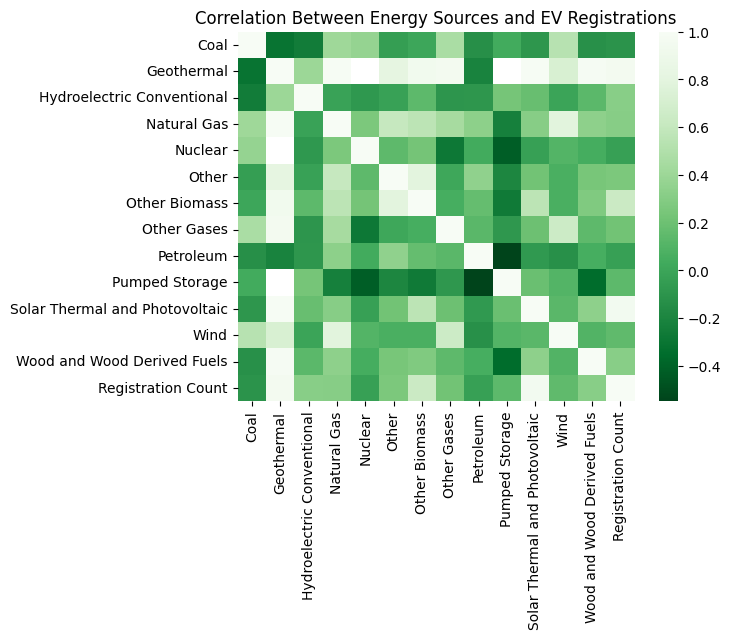

In [45]:
sns.heatmap(correlation,cmap='Greens_r')
plt.title("Correlation Between Energy Sources and EV Registrations")
plt.show()

This heatmap shows the correlation between various energy sources and EV registration counts across states. It highlights how the use of different energy types (like solar, wind, coal) relates to the number of electric vehicles—positive correlations are lighter green, and negative correlations are darker green.


**4.TIME SERIES ANALYSIS:**

**TASK 4.1: CONDUCT TIME SERIES ANALYSIS TO TRACK CHANGES IN EV REGISTRATIONS AND ENERGY PRODUCTION OVER TIME.**

In [46]:
energy_ts = energy_generation[energy_generation['ENERGY SOURCE'] != 'Total']
ts_energy = energy_ts.groupby(['YEAR', 'ENERGY SOURCE'])['Generation(MWh)'].sum().reset_index()
ts_pivot_table = ts_energy.pivot(index='YEAR', columns='ENERGY SOURCE', values='Generation(MWh)')

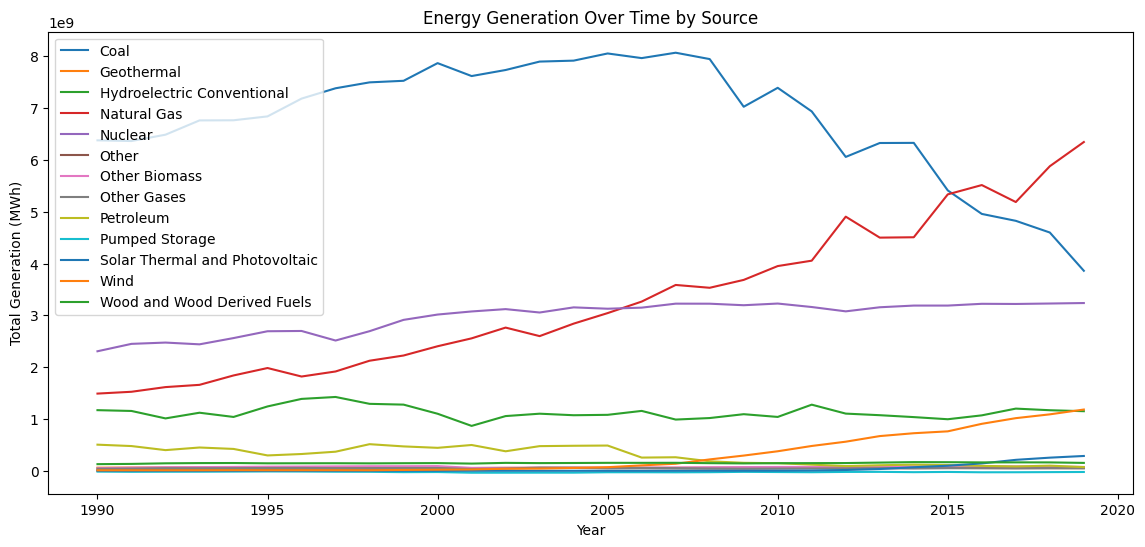

In [47]:
ts_pivot_table.plot(figsize=(14, 6))
plt.title('Energy Generation Over Time by Source')
plt.xlabel('Year')
plt.ylabel('Total Generation (MWh)')
plt.legend()
plt.show()


**TASK 4.2: IDENTIFY ANY SEASONAL TRENDS OR LONGTERM SHIFTS IN THE DATA.**


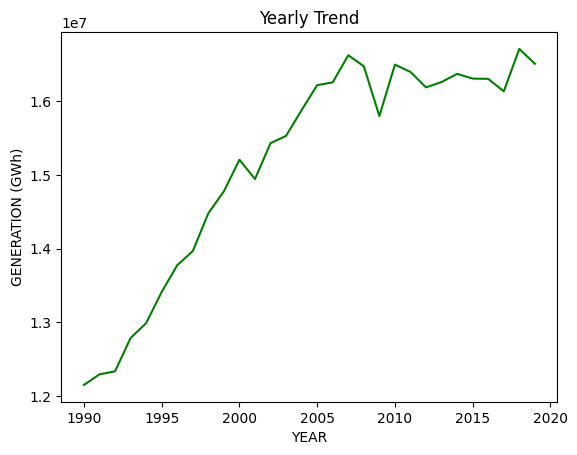

In [48]:
yearly_trend = Energy_Source.groupby('YEAR')['GENERATION (GWh)'].sum().reset_index()
sns.lineplot(data=yearly_trend,x='YEAR',y='GENERATION (GWh)',color='green')
plt.title('Yearly Trend')
plt.show()

**5. GEOSPATIAL ANALYSIS:**

**TASK 5.1: MAP THE DISTRIBUTION OF EV REGISTRATIONS ACROSS STATES USING GEOSPATIAL VISUALIZATION TECHNIQUES.**

In [49]:
GEOSPATIAL_VISUALIZATION = px.choropleth(
    merge_of_states,
    locations='state_code',
    locationmode='USA-states',
    color='Registration Count',
    scope='usa',
    title='EV Registrations by State (2018)')
GEOSPATIAL_VISUALIZATION.show()

**TASK 5.2: COMPARE THESE DISTRIBUTIONS WITH THE
LOCATIONS OF MAJOR RENEWABLE ENERGY PROJECTS.**

In [50]:
ts_pivot=pd.merge(merge_of_states,Yearly_Production,left_on='state_code',right_on='STATE',how='inner')
ts_pivot.drop(['state_name','STATE','State','YEAR','TYPE OF PRODUCER','ENERGY SOURCE','GENERATION (GWh)'],axis=1,inplace=True)
t=ts_pivot.pivot_table(index='state_code',values=['Registration Count','Generation(MWh)']).reset_index()

In [51]:
fig = px.scatter(t,x='Registration Count',y='Generation(MWh)',color='state_code',size='Generation(MWh)')
fig.show()
